# Project: Business Public Sentiment

Design a model to predict the sentiment (positive or negative) of text and apply it to the twitter feed of a business.


## Structure

Take a look at the files in the directory to better understand the structure of the project. 

- `data/`: Folder containing the training and test data.
- `models/`: Folder containing models.
    - `baseline_model.py`: A baseline model to start with.
    - `model.py`: The final model.


## Understanding the data-set

The training data was in a single cvs file which was over 200M in size so I've split the file into smaller files for easy of use. You can also see the testdata which is very small relative to the amount of training data.

In [9]:
print("List all the files in the data directory\n")
!ls data

List all the files in the data directory

testdata.manual.2009.06.14.csv
training.500000.processed.noemoticon.csv


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
# Load the data
dataframe = pd.read_csv("data/training.500000.processed.noemoticon.csv", sep=',', names=['Labels','Id', 'Date', 'Query', 'User', 'Text'], encoding='ISO-8859-1', header=None)
dataframe.head()

,Labels,Id,Date,Query,User,Text
0,0,2205441133,Wed Jun 17 04:44:48 PDT 2009,NO_QUERY,Julie_oh,@tiedyeina lucky you! 6 more days
1,0,2205441225,Wed Jun 17 04:44:49 PDT 2009,NO_QUERY,KatieBug1112,Morning everyone! :-D not in a good mood righ...
2,0,2205441321,Wed Jun 17 04:44:50 PDT 2009,NO_QUERY,jbh_dc,Back in rainy reston ... With a wife who has t...
3,0,2205441485,Wed Jun 17 04:44:51 PDT 2009,NO_QUERY,aaakritiLove,"@jysla :S:S whats wrong, dear?"
4,0,2205441608,Wed Jun 17 04:44:52 PDT 2009,NO_QUERY,JackyDouglas,Hates the rain!


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D1861D860>,
      dtype=object)

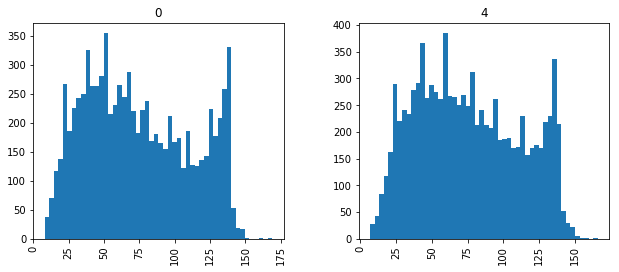

In [3]:
# Preprocess the data and display a histogram of the length of the text
dataframe_subset = dataframe[230000:247952] #dataframe[795000:805000] Midpoint: 238476
dataframe_subset = dataframe_subset.reset_index(drop=True)

twitterData = dataframe_subset.drop(columns=['Id', 'Date', 'Query', 'User'])
twitterLabelledData = dataframe_subset.drop(columns=['Id', 'Date', 'Query', 'User'])

twitterData.groupby('Labels').describe()
twitterData['Length'] = twitterData['Text'].apply(len)
twitterData.hist(column = 'Length', by = 'Labels', bins = 50, figsize = (10, 4))

In [4]:
# Convert the data to a frequency matrix
twitterText = twitterData.drop(columns=['Length', 'Labels'])
dfToA = twitterText.values.flatten()
count_vector = CountVectorizer(stop_words='english')
count_vector.fit(dfToA)
names = count_vector.get_feature_names()
doc_array = count_vector.transform(dfToA).toarray()

# Add the column names back in to show the frequescy matrix
frequency_matrix = pd.DataFrame(data=doc_array, columns=names)
frequency_matrix.head()

,00,000,0000r0cx,0007,000th,00am,01,01000101,01614948343,018,...,½rmï,½s,½se,½stand,½t,½tï,½ve,½y,½ï,ã¼ã
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Create, fit and test the baseline model
from models.baseline_model import BaselineModel

baseline_model = BaselineModel(twitterLabelledData)
baseline_model.splitData(p=True)
baseline_model.cvDataset()
baseline_model.fitNaiveBayes()
baseline_model.predict()
baseline_model.printScores()

 
Number of rows in the total set: 17952
Number of rows in the training set: 13464
Number of rows in the test set: 4488
 
   Labels                                               Text
0       0                               i need holiday...   
1       0                @MsA1sinceday1 forgot about me  lol
2       0  I'm not sure why I bother fixing my hair in th...
3       0  @MaryRincon its mystery disease, i'm negative ...
4       0  I miss L.A!!! And I miss my aunt!!!!And Carlos...
 
Accuracy score:  0.7667112299465241
Precision score:  0.7834830979888746
Recall score:  0.7719224283305227
F1 score:  0.7776598003822467


In [8]:
# Create a SVM 
#import time
#from sklearn import svm
#from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
#classifier_linear = svm.SVC(kernel='linear')
#t0 = time.time()
#classifier_linear.fit(train_vectors, trainData['Label'])
#t1 = time.time()
#prediction_linear = classifier_linear.predict(test_vectors)
#t2 = time.time()
#time_linear_train = t1-t0
#time_linear_predict = t2-t1
# results
#print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

# Create, fit and test the baseline model
from models.model import Model

model = Model(twitterLabelledData)
model.splitData(p=True)
#model.cvDataset()
#model.fitNaiveBayes()
#model.predict()
#model.printScores()


 
Number of rows in the total set: 17952
Number of rows in the training set: 13464
Number of rows in the test set: 4488
 
   Labels                                               Text
0       0                               i need holiday...   
1       0                @MsA1sinceday1 forgot about me  lol
2       0  I'm not sure why I bother fixing my hair in th...
3       0  @MaryRincon its mystery disease, i'm negative ...
4       0  I miss L.A!!! And I miss my aunt!!!!And Carlos...
